## Pandas analysis

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [1]:
# if you didn't download it yet, please get the relevant file now!
#!wget https://www.dropbox.com/s/xvjzaxzz3ysphme/data_000637.txt -P ~/data/


In [2]:
#import necessary packages and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Ex 1

#I use the entire file to create the dataframe
path = "C:/Users/franc/OneDrive/Desktop/Unipd/Magistrale/Terzo semestre/High Level Programming/data/data_000637.txt"
df = pd.read_csv(path)
N = len(df)

#check
df.head()



,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25


In [4]:
#Ex 2

#find the maximum (update value) over the BX_COUNTER column
x = max(df['BX_COUNTER'])
print("x is equal to:", x)

x is equal to: 3563


In [5]:
#Ex 3 - 4

#Add a column representing the instant the measure was taken
df['time']=df['TDC_MEAS']*25/30+df['BX_COUNTER']*25+df['ORBIT_CNT']*x*25

#take the difference of the 'time' entries bw the last and the first rows
diff = df.loc[N-1, 'time']-df.loc[0, 'time']
print("The measurment took", str(diff), "ns, that is", str(diff*10**-9), "s.")

The measurment took 980140993.3125 ns, that is 0.9801409933125 s.


In [6]:
#Ex 5

df['HEAD'] = np.random.randint(0, 2, N)

#check
df.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time
0,0,0,123,3869200167,2374,26,3.446490e+14
1,0,0,124,3869200167,2374,27,3.446490e+14
2,1,0,63,3869200167,2553,28,3.446490e+14
3,0,0,64,3869200167,2558,19,3.446490e+14
4,0,0,64,3869200167,2760,25,3.446490e+14


In [7]:
#Ex 6

data = df[df['HEAD']==1].copy()

#check
data.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time
2,1,0,63,3869200167,2553,28,3.446490e+14
5,1,0,63,3869200167,2762,4,3.446490e+14
11,1,0,64,3869200167,2786,19,3.446490e+14
12,1,1,6,3869200167,2792,18,3.446490e+14
15,1,1,139,3869200167,2797,0,3.446490e+14


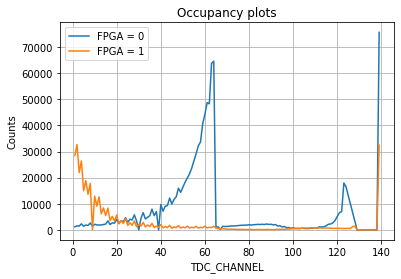

In [8]:
#Ex 7

ch0, num0 = np.unique(df[df['FPGA']==0]['TDC_CHANNEL'], return_counts=True)
ch1, num1 = np.unique(df[df['FPGA']==1]['TDC_CHANNEL'], return_counts=True)

plt.plot(ch0, num0, label="FPGA = 0")
plt.plot(ch1, num1, label="FPGA = 1")
plt.xlabel("TDC_CHANNEL")
plt.ylabel("Counts")
plt.legend()
plt.grid()
plt.title("Occupancy plots")
plt.show()

In [9]:
#Ex 8

noisy = df.groupby(['TDC_CHANNEL']).size().sort_values(ascending=False)

print("Top3 noisy channels:")
print(noisy[:3])

Top3 noisy channels:
TDC_CHANNEL
139    108059
64      66020
63      64642
dtype: int64


In [10]:
#Ex 9

#unique orbits
u_orbits = np.unique(df['ORBIT_CNT'])
#number of unique orbits
nu = len(u_orbits)


#unique orbits with TDC_CHANNEL = 139
u_orbits139 = np.unique(df[df['TDC_CHANNEL']==139]['ORBIT_CNT'])
#number of unique orbits with TDC_CHANNEL = 139
nu139 = len(u_orbits139)

print("There are", str(nu), "unique orbits and", str(nu139), "orbits with TDC_COUNT = 139.")

There are 11001 unique orbits and 10976 orbits with TDC_COUNT = 139.
